# COGS 108 - Analyzing the Effect of Environmental Conditions on Traffic Accidents in San Diego
Video ： https://drive.google.com/file/d/1X7LpVnYYSHKWQ3phAEoXeS1sgtbYlNkW/view?usp=sharing

# Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [ X ] YES - make available
* [  ] NO - keep private

# Names

- Andrew Consiglio
- Cameron Haghighat
- Yusheng Liang 
- Jimmy Huang
- Samer Ahmed

# Abstract

This project looks at how weather, lighting, road conditions, and the time of day affect the number and severity of traffic accidents in San Diego County. The objective is to identify the key factors influencing traffic incidents and their outcomes so that stakeholders, such as emergency services, insurance companies, and public safety organizations, can receive relevant information. Using well-documented data on traffic collisions, the study looks at trends in accident frequency and severity, paying particular attention to external factors like rain and wet pavement that are known to cause crashes. Preliminary research also shows how human actions, such as reckless or inattentive driving, can raise the risk of accidents. Significant trends and important factors influencing traffic incidents are identified by the study using statistical analyses, such as one-way ANOVA, on well-documented collision data. The results show that precipitation and poor visibility considerably raise the frequency and severity of accidents (p-value = 0.0). This analysis's goal is to direct preventative measures to reduce traffic.We also created a model to predict severity, which allowed us to understand how each variable in the dataset impacts the probability of seeing a crash at a specific severity.

# Research Question


How does weather, lighting conditions, road conditions, and day of the week impact the frequency and severity of traffic collisions in San Diego County? Which factor most significantly impacts the frequency of traffic collisions and which factors most significantly impact the severity of them.



## Background and Prior Work

Accidents are reported everyday and this helps keep track of records, but what if we can use this to help other organizations to improve their services. Like for example maybe a hospital wants to know when to overstaff the emergency room vs not. Additionally, insurance companies can estimate when to increase prices for coverage based on the time or day that’s more prone to accidents. We want to take a closer look at which days have the highest number of accident cases. 

Post-initial research we found that traffic collisions in San Diego are well documented and numerous. We also found a lot of evidence suggesting that wet pavement/rainfall are the most common weather-related factors that cause crashes. When researching what factors were most influential, this <a name="cite_ref-1"></a>[article](https://pasternackinjurylaw.com/causes-of-car-accidents-in-san-diego/) suggested that internal factors like reckless or distracted driving were the biggest culprits in collisions, which I think makes our project more interesting. You can’t predict whether someone will be distracted, but by correlating crashes with external factors like time of day, we can predict the frequency of crashes. Additionally, this <a name= "cite_ref-2"></a>[article](https://www.elkandelk.com/washington/do-environmental-factors-cause-car-accidents/) goes a bit deeper into the external and weather-related factors, but doesn’t use evidence to justify their rankings.

 One example of a <a name= "cite_ref-3"></a>[study](https://www.sciencedirect.com/science/article/pii/S2352146517307147) that was done on a similar question. This article looks at how roadway conditions and environmental factors have an impact on the severity of car accidents. Our scope is more specific in terms of location, as we’re only looking at San Diego. We also look at a variety of other factors that we deem as potentially important, like type of car and time of day.

Another <a name="cite_ref-4"></a>[study](https://nycdatascience.com/blog/student-works/united-states-car-accident-analysis/) done about traffic accidents based on time around the country. Some of the results of the study show the numbers of accidents based on the day of the week, month, and also year. The study showed that there were more accidents at 2 AM on the days of Saturday and Sunday. There was also data on traffic accidents by month. It showed that there may be a relationship between time of the year and the number of accidents.Again, this hints at the possible relationship between weather conditions and traffic accidents, since the study shows that there were more accidents during the winter period of the year. This could be an interesting relationship and may warrant further investigation. 

Due to the high level of traffic with environmental factors, such as weather and road conditions, traffic collisions will be a growing concern in urban areas like San Diego. Thus, one can assess the impact of various factors on accident frequencies and severities and explore preventing accidents through mitigating measures taken by local governments to assure better safety of the roads.

# Hypothesis




We hypothesize that poor weather conditions such as rain or fog worsening road conditions such as construction zones or slick surfaces and days of the week like Friday and Saturday will show a strong association with higher collision frequencies and severity. This is our prediction because current research shows these factors increase the risk of an accident and the severity of the impact.


# Data


We found this dataset by <a name="cite_ref-1"></a>[SANDAG](https://opendata.sandag.org/Transportation/Safety-Collisions-SWITRS-2023/7mrt-w2uu/about_data), which we thought was similar to the ideal dataset we wanted. Here they have the day of the week the accident occurred, time, location, weather and the degree of collision which is what we wanted. But we do see that the date is not mentioned, this gives us a limitation in that we cannot figure out if it occurred in a holiday which could help us figure out certain outliers as in why a certain specific Friday had a higher rate of cases for example.

## Data overview

- US Accidents (2016 - 2023)
- Link to the Dataset: [US Accidents on Kaggle](https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents/data)
- Number of Observations: 7728394
- Number of Variables: 46

This dataset provides details on car accidents in the U.S. from 2016 to 2023. The key variables include County, Visibility (in miles), Severity (measured on a scale of 1 to 4), Start_Time, End_TIme (timestamps of the accident), Date, Weather_Condition (weather during the accident), Humidity, Wind Speed, and Temperature. These factors act as proxies for the situational and environmental factors that could affect the frequency and severity of accidents. Other variables include datetime, numerical, and categorical types, whereas severity metrics are categorical (ordinal scale).


Initially, we’ll start with filtering out data based on county/city since we want a dataset specific to San Diego. Cleaning would involve dealing with missing values and standardizing the format of data like extracting the date from the endtime and starttime. We’d also want to remove duplicate values and, if necessary, code categorical variables numerically for modeling purposes.  

### List of keywords used:
- ID
- Severity
- Start_Time
- End_Time
- County
- Weather_Timestamp
- Visibility
- Precipitation
- Weather condition
- Sunrise_Sunset


## US Accidents (2016 - 2023)

In [93]:
# import important packages
import pandas as pd
import numpy as np
import seaborn as sns
#import matplotlib for visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style

In [94]:
data = pd.read_csv('US_Accidents_March23.csv')
data = data[data['County'] == 'San Diego']
data = data[['ID', 'Severity', 'Start_Time', 'End_Time', 'City', 'County', 
      'Visibility(mi)', 'Precipitation(in)', 'Weather_Condition', 'Sunrise_Sunset']]
data = data.rename(columns = {
    'Visibility(mi)': 'Visibility',
    'Precipitation(in)': 'Precipitation'
})

First, we only want to find the accidents that were reported to be in San Diego County, and we do this by running the code `data = data[data['County'] == 'San Diego']`

Then, we keep only the columns that we are interested in, which includes the following: `['ID', 'Severity', 'Start_Time', 'End_Time', 'City', 'County', 'Visibility(mi)', 'Precipitation(in)', 'Weather_Condition', 'Sunrise_Sunset']`

We renamed the `'Visibility(mi)'` and `'Precipitation(in)'` columns to just be `'Visibility'` and `'Precipitation'` because we do not really want to have units included in our column names, and the units should already be explained previously. 

In [95]:
data.isna().mean()

ID                   0.000000
Severity             0.000000
Start_Time           0.000000
End_Time             0.000000
City                 0.000000
County               0.000000
Visibility           0.008813
Precipitation        0.292209
Weather_Condition    0.009264
Sunrise_Sunset       0.003158
dtype: float64

Here, we checked the proportion of missing values in each of our columns of interest. The interesting thing to note here is that about 30% of the data is missing in our `'Precipitation'` column. We want to explore why that is. 

In [96]:
data[data['Precipitation'].isna()]['Weather_Condition'].value_counts()

Weather_Condition
Clear                     12764
Mostly Cloudy              4639
Overcast                   4274
Partly Cloudy              3865
Scattered Clouds           2870
Haze                        657
Fair                        139
Fog                         129
Light Rain                  117
Rain                         54
Cloudy                       33
Mist                         26
Heavy Rain                   17
Volcanic Ash                 12
Light Drizzle                 6
Drizzle                       6
Fair / Windy                  3
Smoke                         2
Hail                          1
Thunderstorms and Rain        1
Name: count, dtype: int64

We also have another column that may have information about whether it was raining or not, and that is the `'Weather_Condition'` column. By running the above code, we can see that most of the time when `'Precipitation'` is missing, it is not actually raining. Only a few of the 100 thousand rows of our data actually have rain and we do not think that this will make a difference in our our analyses, so we can just fill all of these values with 0. We can just drop the rest of the missing values in other columns because only a few of them are actually missing. 

In [97]:
data['Precipitation'] = data['Precipitation'].fillna(0.0)
data = data.dropna()
data.shape

(102717, 10)

After dropping the missing values, we still have over 100,000 observations to work with, which is plenty for our analyses. 

Next, we want to do something about the `'Start_Time'` and `'End_Time'` columns to make it usable for our analyses. 

In [98]:
data['Start_Time'] = pd.to_datetime(data['Start_Time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
data['Year'] = data['Start_Time'].dt.year
data['Month'] = data['Start_Time'].dt.month
data['Day'] = data['Start_Time'].dt.day
data['DotW'] = data['Start_Time'].dt.day_name()
data = data.drop(['End_Time'], axis=1)
data = data.reset_index(drop=True)

The `'Start_Time'` and `'End_Time'` columns contain a lot of time information. It includes everything like the date and the exact time that the accident was reported to start or end. In order to make this jumble of information usable, we want to separate this information into separate columns. For this we are only interested in `'Start_Time'` and we can just drop `'End_Time'` column. 

First, we cast the `'Start_Time'` columns into DateTime objects. This allows us to extract the Year, Month, Day, and even the day of the week from our columns. This way, we add 4 columns to our data, which is `'Year'`, `'Month'`, `'Day'`, and the day of the week, which we named `'DotW'`. This encompasses the time and date that a specific accident occurs. 

Here are the first few rows of our cleaned dataset:

In [99]:
data.head()

,ID,Severity,Start_Time,City,County,Visibility,Precipitation,Weather_Condition,Sunrise_Sunset,Year,Month,Day,DotW
0,A-42876,2,2016-06-21 10:39:52,Vista,San Diego,9.0,0.0,Partly Cloudy,Day,2016.0,6.0,21.0,Tuesday
1,A-42887,3,2016-06-21 10:57:39,San Diego,San Diego,9.0,0.0,Scattered Clouds,Day,2016.0,6.0,21.0,Tuesday
2,A-42888,3,2016-06-21 10:50:48,San Diego,San Diego,10.0,0.0,Mostly Cloudy,Day,2016.0,6.0,21.0,Tuesday
3,A-42889,3,2016-06-21 10:50:13,Escondido,San Diego,9.0,0.0,Partly Cloudy,Day,2016.0,6.0,21.0,Tuesday
4,A-42896,2,2016-06-21 11:12:25,Spring Valley,San Diego,10.0,0.0,Clear,Day,2016.0,6.0,21.0,Tuesday


# Results

## Exploratory Data Analysis

How does weather, lighting conditions, road conditions, and day of the week impact the frequency  and severity of traffic collisions in San Diego County? Which factor most significantly impacts the frequency of traffic collisions and which factors most significantly impact the severity of them.

### Univariate Distributions

Severity

Severity
2    0.789382
3    0.202099
4    0.006601
1    0.001918
Name: proportion, dtype: float64

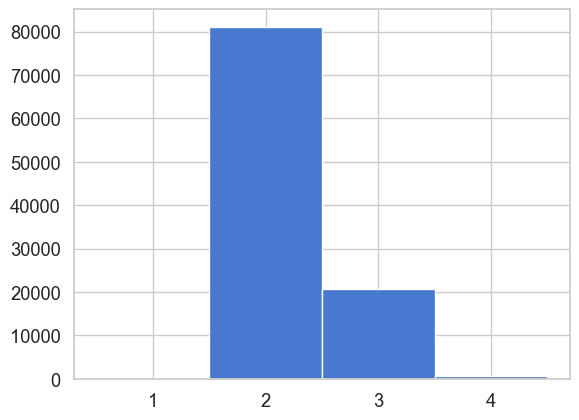

In [100]:
plt.hist(data['Severity'], bins=4, range=(1, 5), align='left', rwidth=1)
plt.xticks([1, 2, 3, 4])
data['Severity'].value_counts()
data['Severity'].value_counts(True)

It's important to note severity is based on the impact on traffic. Most accidents (78.9%) have a severity of 2, with less than 1% of accidents classified as 1 or 4. From this we can use the context of car crashes to determine what each severity represents. Since 1 is actually our least common severity, we could assume that these are essentially non-incidents: either misreported, no damage to either vehicles, etc. 4 is likely the opposite of this. Since there's such a small proportion of crashes with a severity of 4, we can assume these are catastrophic crashes, with the impact on traffic being very high. Even though severity doesn't measure the deadliness of a crash, we can assume that crashes with a much greater impact on traffic are also the ones where most damage was caused (more time to clear cars from roadway, possible involvement of paramedics and firemen, etc.).

### Observe Weather Counts

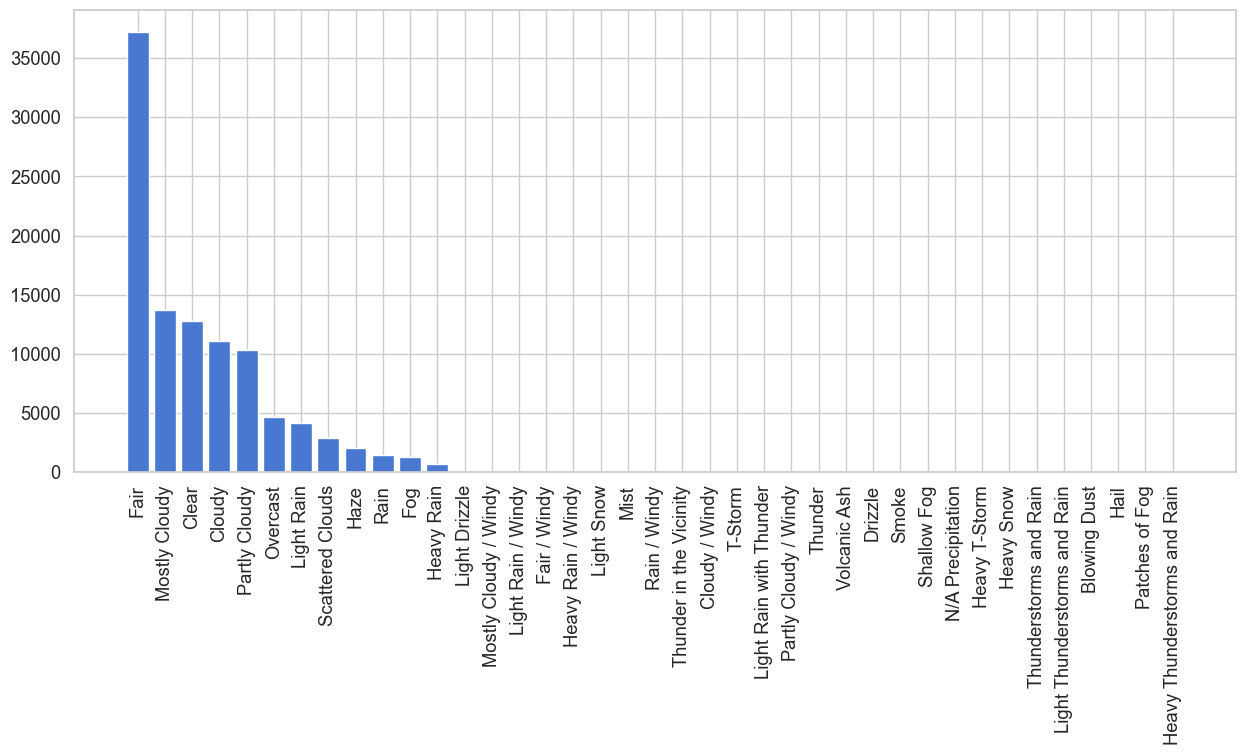

Weather_Condition
Fair                            0.362413
Mostly Cloudy                   0.133074
Clear                           0.124624
Cloudy                          0.108113
Partly Cloudy                   0.100295
Overcast                        0.045591
Light Rain                      0.040100
Scattered Clouds                0.028350
Haze                            0.019393
Rain                            0.014087
Fog                             0.011984
Heavy Rain                      0.006659
Light Drizzle                   0.000623
Mostly Cloudy / Windy           0.000584
Light Rain / Windy              0.000555
Fair / Windy                    0.000458
Heavy Rain / Windy              0.000389
Light Snow                      0.000341
Mist                            0.000282
Rain / Windy                    0.000282
Thunder in the Vicinity         0.000263
Cloudy / Windy                  0.000175
T-Storm                         0.000166
Light Rain with Thunder         0.00015

In [101]:

weather_counts = data['Weather_Condition'].value_counts()
plt.figure(figsize=(15, 6))
plt.bar(weather_counts.index, weather_counts.values)
plt.xticks(rotation=90)
plt.show()
data['Weather_Condition'].value_counts(True)

In [102]:
data['Date'] = data['Start_Time'].dt.strftime('%m-%d-%Y')

# WEATHER BY DAY

grouped = data.groupby(['Date', 'Weather_Condition']).size().reset_index(name='count')
most_observed = grouped.loc[grouped.groupby('Date')['count'].idxmax()]
most_observed = most_observed.drop(columns=['count']).reset_index(drop=True)
most_observed

,Date,Weather_Condition
0,01-01-2018,Mostly Cloudy
1,01-01-2019,Clear
2,01-01-2020,Mostly Cloudy
3,01-01-2021,Fair
4,01-01-2022,Fair
...,...,...
2473,12-31-2018,Light Rain
2474,12-31-2019,Fair
2475,12-31-2020,Fair
2476,12-31-2021,Cloudy


In [103]:
most_observed['Weather_Condition'].value_counts(True)

Weather_Condition
Fair                0.353914
Clear               0.276836
Cloudy              0.119451
Mostly Cloudy       0.102906
Overcast            0.070218
Partly Cloudy       0.026634
Light Rain          0.025827
Scattered Clouds    0.010492
Haze                0.008071
Fog                 0.002421
Rain                0.002421
Heavy Rain          0.000807
Name: proportion, dtype: float64

Fair is by far the most observed weather condition at 36%, with Mostly Cloudy in second with 13%. This makes sense for San Diego, where we experience an average rainfall of about 10 inches each year. This means most of the crashes we're going to encounter are going to be during 'Fair' weather, which we'll have to account for in our analysis. Our most observed Series outputs the most commonly observed weather for each day in our dataset. Here we also see that 'Fair' is the most common weather condition in San Diego. By creating this Series it will also be easier to breakdown how weather impacts crashes proportionally. If we just looked at the weather condition of each crash, we would wrongly conclude that 'Fair' weather causes accidents since the largest proportion of accidents occur on fair days. Knowing the proportion of rainy or hazy days, we can account for the fact that we observe this type of weather far less in San Diego.

### Different Factors and Frequency of Crashes


In [104]:
data_copy = data.copy()


weather_mapping = {
    "Fair": "Clear",
    "Clear": "Clear",
    "Partly Cloudy": "Cloudy",
    "Mostly Cloudy": "Cloudy",
    "Scattered Clouds": "Cloudy",
    "Overcast": "Cloudy",
    "Light Rain": "Rainy",
    "Rain": "Rainy",
    "Heavy Rain": "Rainy",
    "Thunderstorms and Rain": "Rainy",
    "Light Drizzle": "Rainy",
    "Drizzle": "Rainy",
    "Heavy Thunderstorms and Rain": "Rainy",
    "Rain / Windy": "Rainy",
    "Light Rain / Windy": "Rainy",
    "Partly Cloudy / Windy": "Cloudy",
    "Heavy Rain / Windy": "Rainy",
    "Cloudy / Windy": "Cloudy",
    "Fair / Windy": "Clear",
    "Light Thunderstorms and Rain":"Rainy"
}
data_copy['Grouped_Weather_Condition'] = data_copy['Weather_Condition'].replace(weather_mapping)


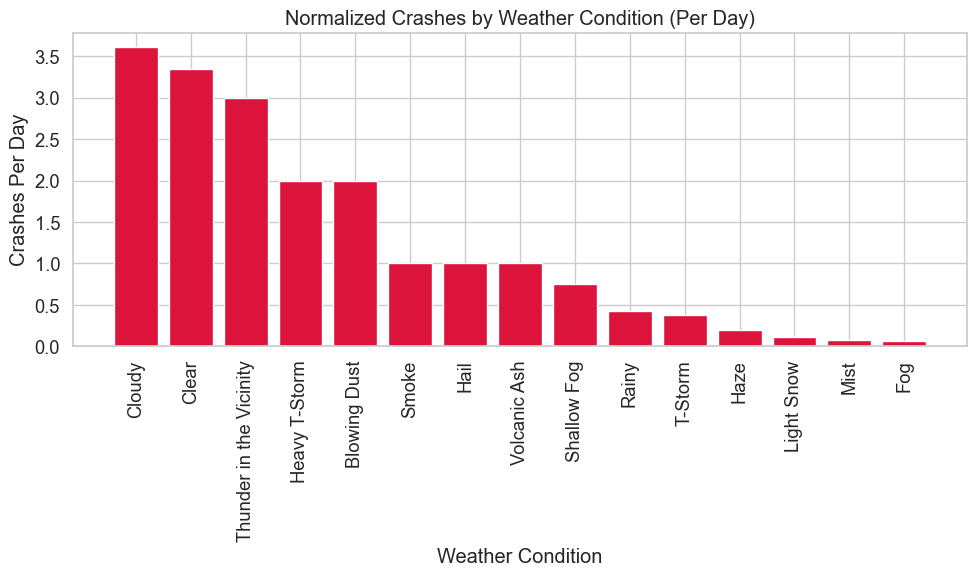

In [105]:
severe_crashes = data_copy[data_copy["Severity"] >= 3]


crash_counts_severe = severe_crashes["Grouped_Weather_Condition"].value_counts()
unique_days_severe = severe_crashes.groupby("Grouped_Weather_Condition")[["Year", "Month", "Day"]].nunique().prod(axis=1)
normalized_severe_crashes = crash_counts_severe / unique_days_severe
normalized_severe_df = pd.DataFrame({
    "Weather_Condition": normalized_severe_crashes.index,
    "Severe_Crashes_Per_Day": normalized_severe_crashes.values
}).sort_values(by="Severe_Crashes_Per_Day" , ascending=False)


plt.figure(figsize=(10, 6))
plt.bar(normalized_severe_df["Weather_Condition"], normalized_severe_df["Severe_Crashes_Per_Day"], color="crimson")
plt.title("Normalized Crashes by Weather Condition (Per Day)")
plt.xlabel("Weather Condition")
plt.ylabel("Crashes Per Day")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In previous graph, it seems that more car accidents happen in "Fair" weather. However, this may be because there are more days of "clear" weather in San Diego, rather than "clear" weather itself being more dangerous. In order to compare various weather conditions in a more balanced way, we divide the total number of collapses under each weather condition by the only number of days that weather condition occurred, thus normalizing the number of collapses. Through this Normalization, the data can be adjusted according to the deviation to ensure that frequent weather conditions, such as "clear", will not dominate the crash data just because they occur more frequently. This enables us to have a better understanding of the relative risk associated with each weather condition. In addition, this analysis only focuses on collisions with a severity greater than or equal to 3, because these collisions have greater impact. Small accidents might not provide much meaningful insight into dangerous situations.

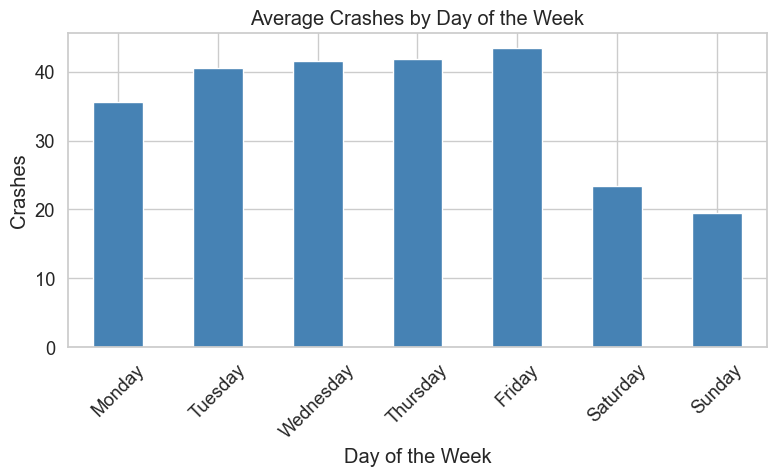

In [107]:
date_range = pd.date_range(start="2016-02-01", end="2023-03-31", freq="D")
days_of_week = pd.DataFrame({"Date": date_range, "Day": date_range.day_name()})

day_occurrences = days_of_week["Day"].value_counts().reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], fill_value=0)

crashes = data["DotW"].value_counts().reindex(day_occurrences.index, fill_value=0)


normalized_crashes = crashes / day_occurrences


plt.figure(figsize=(8, 5))
normalized_crashes.plot(kind="bar", color="steelblue")
plt.title("Average Crashes by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Crashes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The dataset only contains the day where crashes happenes, inorder to see which day of the week has a higher frequency of crashes, we need to normalize the data by calculating the total number of crashes for each day of the week and dividing it by the total occurrences of that day in the time period from February 2016 to March 2023. By doing this, it ensure a fair comparision of crash frequency and day of the week. The graph shows that weekdays have a higher number of collisions, which might caused by higher traffic due to work-related activities. While weekends have fewer crashes, which may be due to reduced traffic flow.

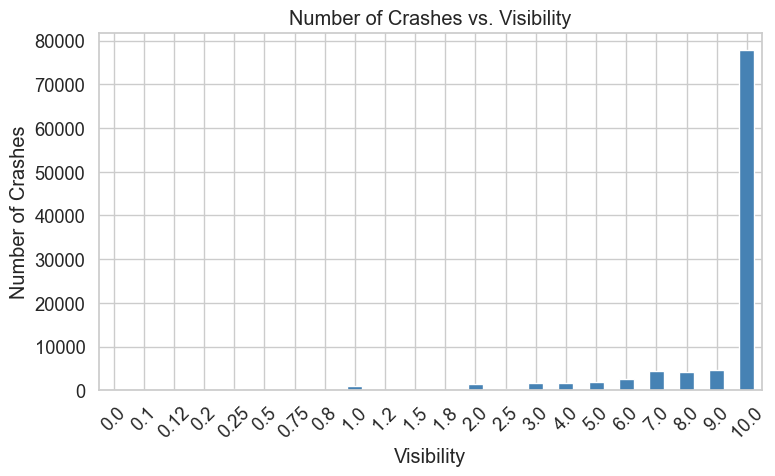

In [108]:
crashes_by_visibility = data["Visibility"].value_counts().sort_index()
plt.figure(figsize=(8, 5))
crashes_by_visibility.plot(kind="bar", color="steelblue")
plt.title("Number of Crashes vs. Visibility")
plt.xlabel("Visibility")
plt.ylabel("Number of Crashes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The graph shows that majority of crashes happens when visbility is at the max level, which could be a result of such vibility condition are more common. Lower visbility level show significantly fewr crashes. The graph shows that visbility is not a key factor that will affect the probility of crahes.

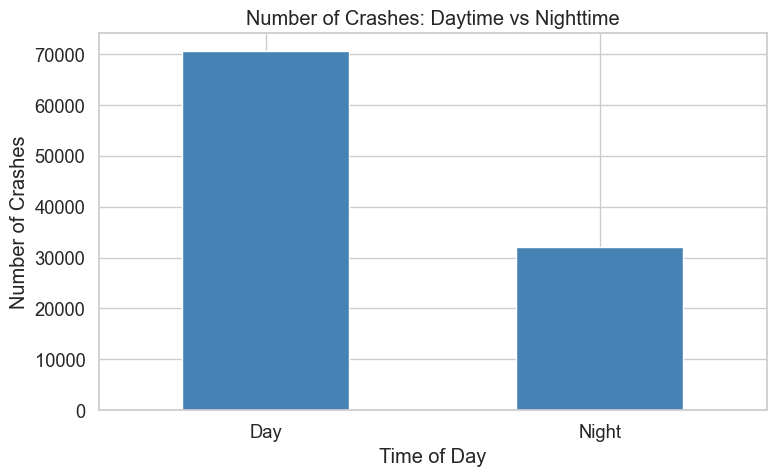

In [109]:
crashes_by_time = data["Sunrise_Sunset"].value_counts()

plt.figure(figsize=(8, 5))
crashes_by_time.plot(kind="bar", color="steelblue")
plt.title("Number of Crashes: Daytime vs Nighttime")
plt.xlabel("Time of Day")
plt.ylabel("Number of Crashes")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

The graph show the Number of Crashes during Day time and Night time. It is showed in the graph that there are more crashes during day time compare to night time. This could be realted to the high traffic during daytime and fewer crashes during night time might due to lower traffics.

## Different Factors and Severity of Crashes


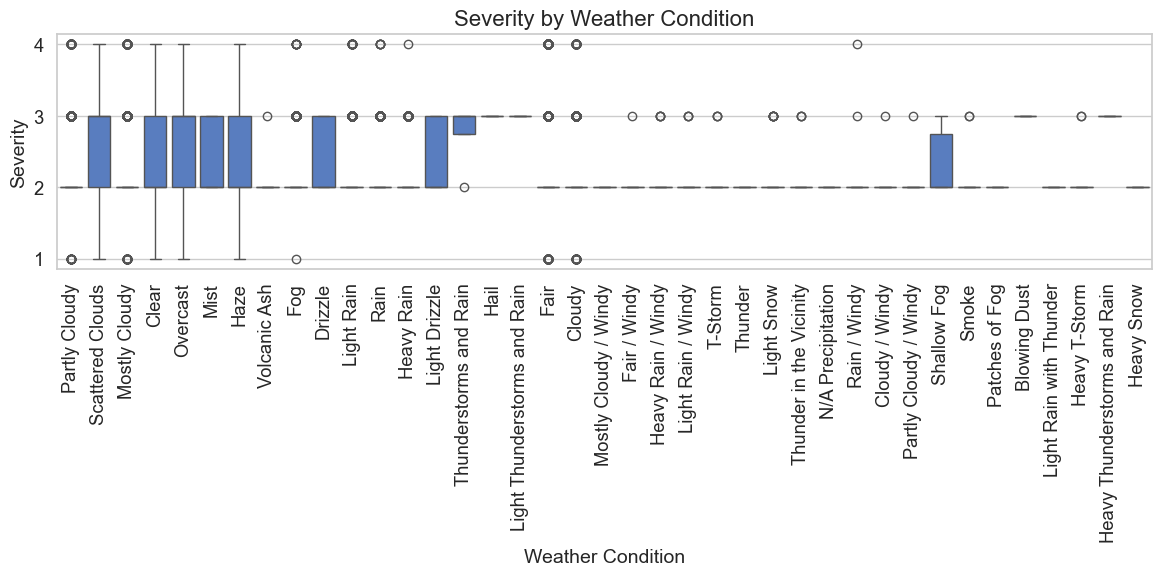

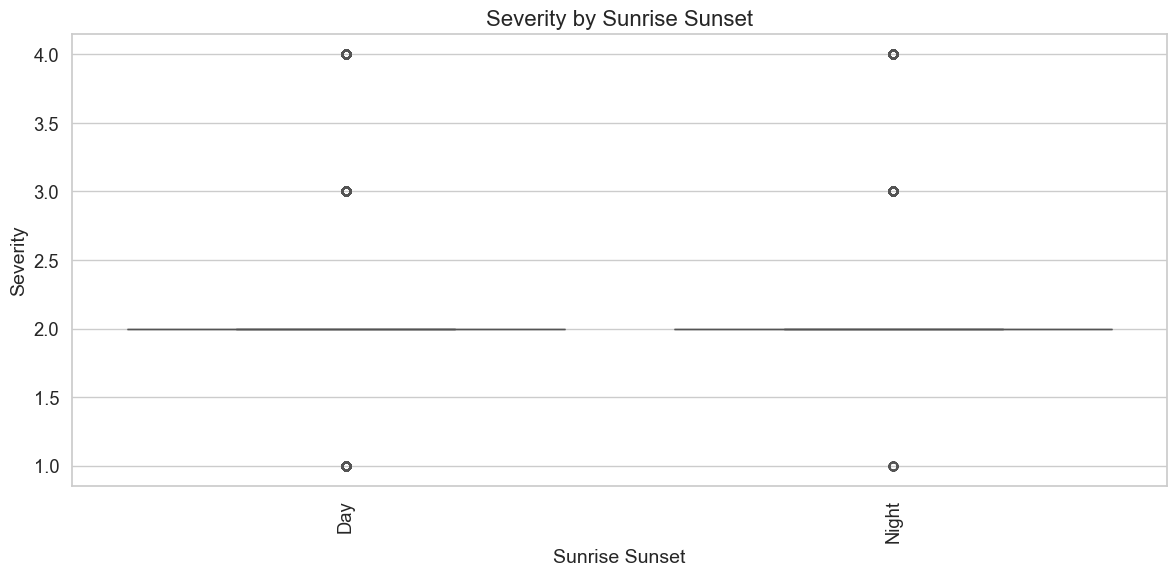

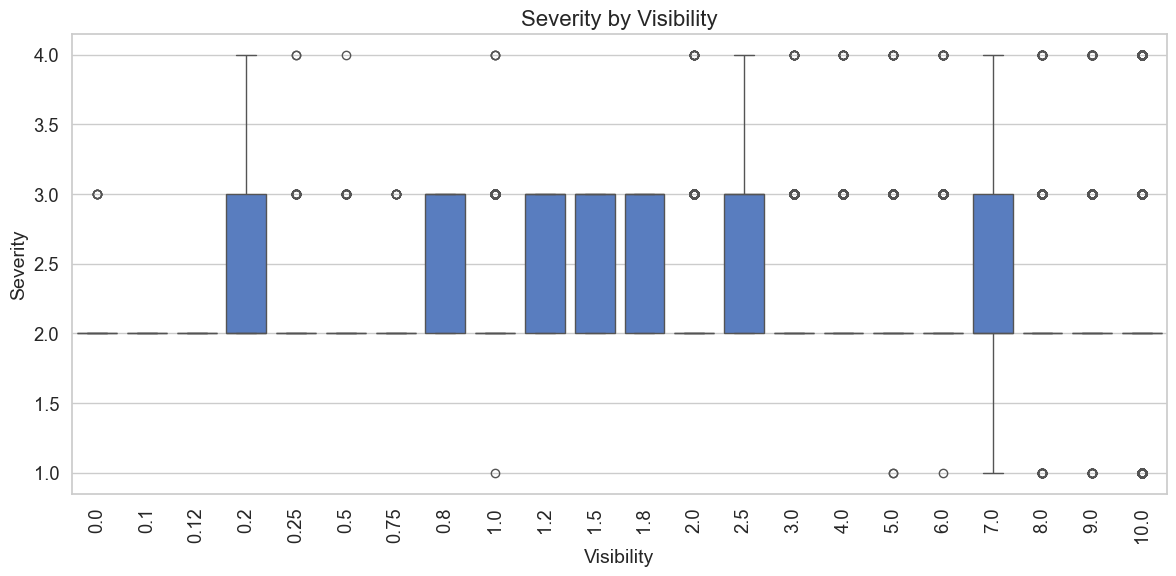

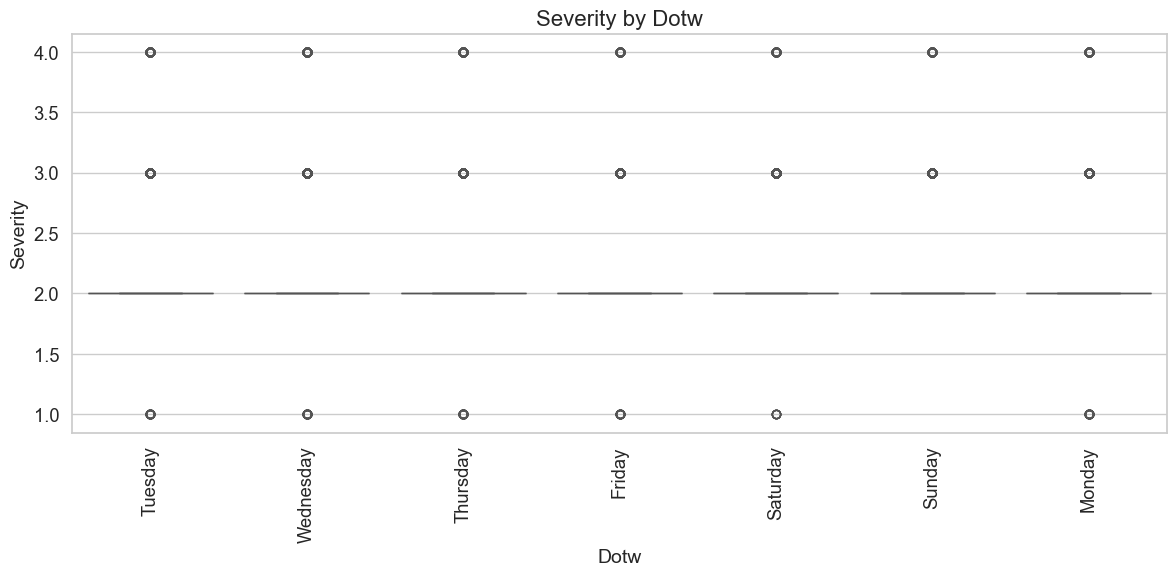

In [110]:
# Configure plot style
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

# List of variables to analyze
variables = ['Weather_Condition', 'Sunrise_Sunset', 'Visibility', 'DotW']

# Create a boxplot for each variable
for var in variables:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=data, x=var, y='Severity')
    plt.title(f'Severity by {var.replace("_", " ").title()}', fontsize=16)
    plt.xlabel(var.replace("_", " ").title(), fontsize=14)
    plt.ylabel('Severity', fontsize=14)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


In [111]:
# Example: Compute average severity by variable
for var in variables:
    print(f"Average Severity by {var.replace('_', ' ').title()}:")
    print(data.groupby(var)['Severity'].mean())
    print("-" * 50)



Average Severity by Weather Condition:
Weather_Condition
Blowing Dust                    3.000000
Clear                           2.477463
Cloudy                          2.110221
Cloudy / Windy                  2.055556
Drizzle                         2.333333
Fair                            2.075028
Fair / Windy                    2.021277
Fog                             2.140536
Hail                            3.000000
Haze                            2.270080
Heavy Rain                      2.166667
Heavy Rain / Windy              2.100000
Heavy Snow                      2.000000
Heavy T-Storm                   2.222222
Heavy Thunderstorms and Rain    3.000000
Light Drizzle                   2.406250
Light Rain                      2.214858
Light Rain / Windy              2.052632
Light Rain with Thunder         2.000000
Light Snow                      2.200000
Light Thunderstorms and Rain    3.000000
Mist                            2.379310
Mostly Cloudy                   2.231912


In [112]:
data['Sunrise_Sunset'].value_counts()

Sunrise_Sunset
Day      70655
Night    32062
Name: count, dtype: int64

We can see that there are almost double the amount of accidents reported at night compared to the day. This may happen for a variety of reasons, such as less activity at night or less patrols at night. 

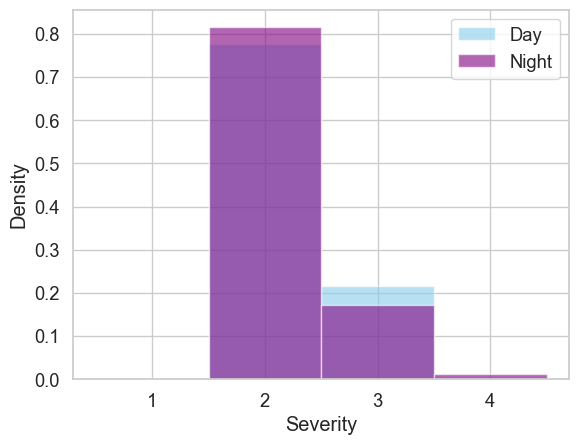

In [113]:
## Comparing the densities of accident severities between ‘Night’ and ‘Day’

plt.hist(data[data['Sunrise_Sunset'] == 'Day']['Severity'], bins=np.arange(1, 6) - 0.5, density=True, alpha=0.6, color='skyblue')
plt.hist(data[data['Sunrise_Sunset'] == 'Night']['Severity'], bins=np.arange(1, 6) - 0.5, density=True, alpha=0.6, color='purple')
plt.xticks([1,2,3,4])
plt.xlabel('Severity')
plt.ylabel('Density')
plt.legend(['Day', 'Night'])
plt.show()


We used a density histogram to find the proportion of accidents reported in day and night based on it severity. From the graph, we can see that the proportions of the different severitities reported for Day vs. Night is about the same. 

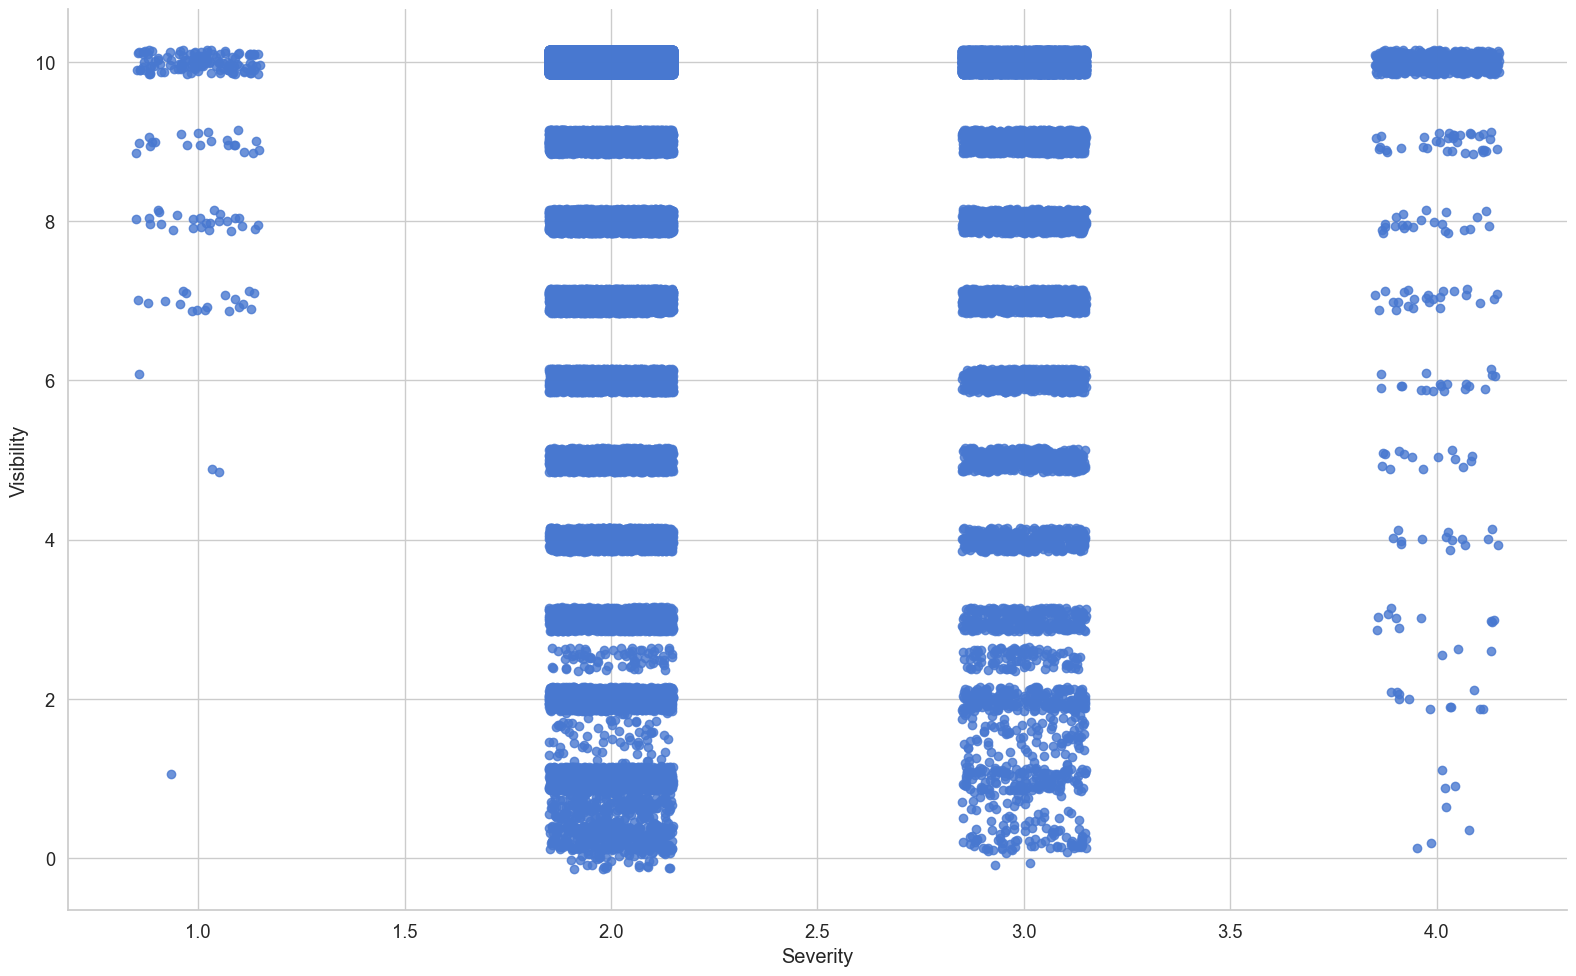

In [114]:
## Visualize Severity against Visibility


sns.lmplot(x='Severity', y='Visibility', data=data,
          fit_reg=False, height=10, aspect=1.6,
         x_jitter=.15, y_jitter=.15);


Here, we can see the number of points reprted for different severities against Visiibility. Originally, our data does not have that much accidents reported that had severities of 1 or 4. We can see the number of accidents reported for severities 2 and 3 are about about even across the different levels of visibility. However, there seems to be more at lower levels of visibility. This makes sense because, the less one can see, the more likely that they will be involved in a car accident. 

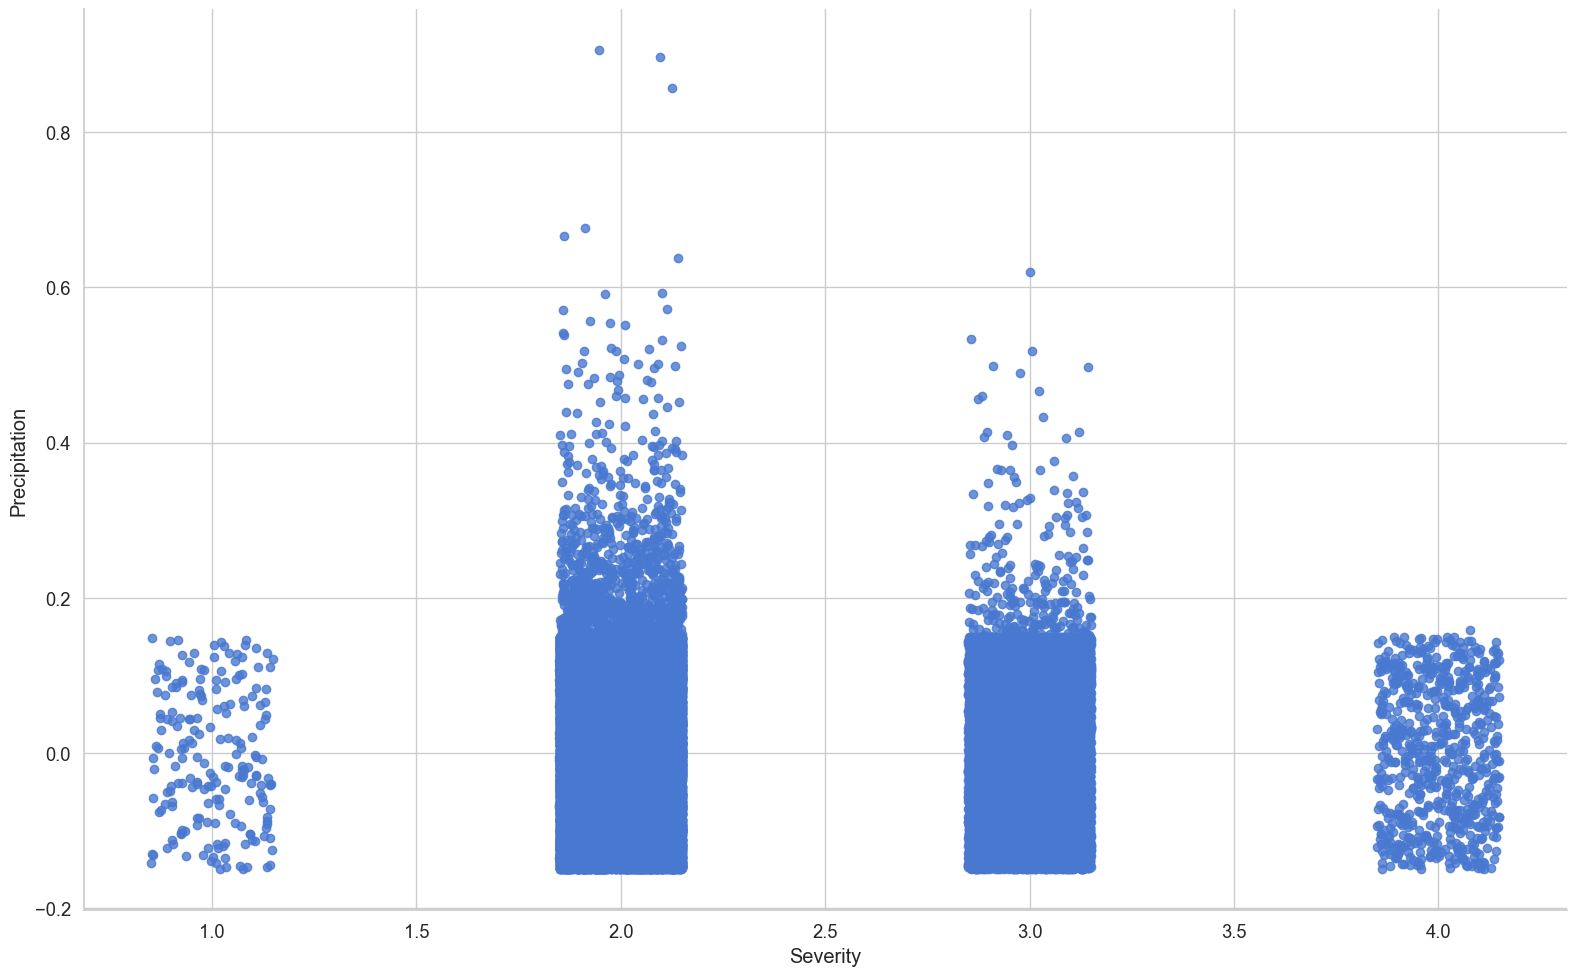

In [115]:
## Visualize Severity against Precipitation


sns.lmplot(x='Severity', y='Precipitation', data=data,
          fit_reg=False, height=10, aspect=1.6,
         x_jitter=.15, y_jitter=.15);


This time, we graph the levels of Severity against Precipitation. Same thing here, there are more accidents reported that are at 2 or 3 for Severity. More accidents are reported at lower precipitation, but there are a few that have been reported at higher levels of precipitation. Another thing to note is that Precipitation is recorded in inches, and the levels of precipitation are pretty low. This may be because it rarely rains here in San Diego, and the levels of rain is on the lower end compared to other places. 

### One-Way ANOVA

In [116]:
# Grouping data by weather conditions to see the mean of each condition by severity and visibility

grouped_data = data.groupby('Weather_Condition')['Severity'].mean()
print(grouped_data)

grouped_data_2 = data.groupby('Weather_Condition')['Visibility'].mean()
print(grouped_data_2)



from scipy.stats import f_oneway

# Creating a list of severity and visibility values for each weather condition
severity_groups = [data[data['Weather_Condition'] == condition]['Severity'] for condition in data['Weather_Condition'].unique()]
visibility_groups = [data[data['Weather_Condition'] == condition]['Visibility'] for condition in data['Weather_Condition'].unique()]

# Perform one-way ANOVA to see the p val and figure if the two variable are significant by the conditions

f_stat, p_val = f_oneway(*severity_groups)
print("F-statistic:", f_stat, "p-value:", p_val)

f_stat, p_val = f_oneway(*visibility_groups)
print("F-statistic:", f_stat, "p-value:", p_val)


Weather_Condition
Blowing Dust                    3.000000
Clear                           2.477463
Cloudy                          2.110221
Cloudy / Windy                  2.055556
Drizzle                         2.333333
Fair                            2.075028
Fair / Windy                    2.021277
Fog                             2.140536
Hail                            3.000000
Haze                            2.270080
Heavy Rain                      2.166667
Heavy Rain / Windy              2.100000
Heavy Snow                      2.000000
Heavy T-Storm                   2.222222
Heavy Thunderstorms and Rain    3.000000
Light Drizzle                   2.406250
Light Rain                      2.214858
Light Rain / Windy              2.052632
Light Rain with Thunder         2.000000
Light Snow                      2.200000
Light Thunderstorms and Rain    3.000000
Mist                            2.379310
Mostly Cloudy                   2.231912
Mostly Cloudy / Windy           2.00000

The p-value of 0.0 for severity and visibility grouped by weather conditions is highly significant, according to the one-way ANOVA test. This suggests that weather has a statistically significant impact on the frequency and severity of traffic accidents in San Diego County. The findings lend credence to the idea that environmental factors, including weather, have a big impact on how accidents turn out. In order to reduce risks and enhance road safety, these findings can guide public safety initiatives, such as implementing stricter traffic laws during inclement weather.

Text(0.5, 1.0, 'Severity of Accidents by Weather Condition')

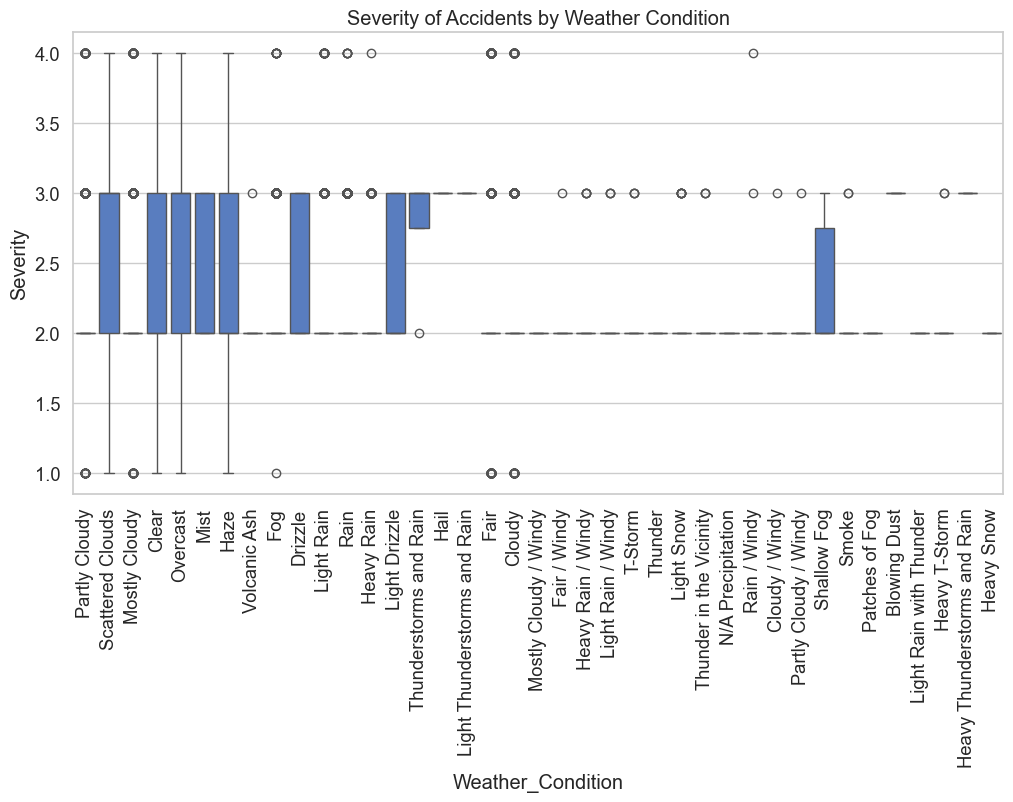

In [117]:
# visualizing by plot to see the difference in how the mean changes across the variables and conditions

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x='Weather_Condition', y='Severity', data=data)
plt.xticks(rotation=90)
plt.title("Severity of Accidents by Weather Condition")


# Analysis

### Predicting Severity Model

Severity
2    0.789382
3    0.202099
4    0.006601
1    0.001918
Name: proportion, dtype: float64

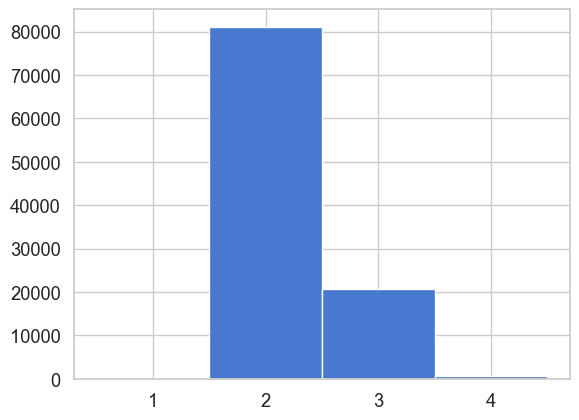

In [121]:
plt.hist(data['Severity'], bins=4, range=(1, 5), align='left', rwidth=1)
plt.xticks([1, 2, 3, 4])
data['Severity'].value_counts()
data['Severity'].value_counts(True)

In [122]:
import sklearn
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

data2 = data.dropna(how='any')

X = data2[['Visibility', 'Precipitation','Weather_Condition', 'Sunrise_Sunset', 'DotW']]
y = data2['Severity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


preproc = make_column_transformer(
    (OneHotEncoder(), ['Weather_Condition', 'Sunrise_Sunset', 'DotW']),
    remainder='passthrough',
)
pl = make_pipeline(preproc, LogisticRegression(max_iter=1000))

pl.fit(X_train, y_train)

pred_train = pl.predict(X_train)
pred_test = pl.predict(X_test)

print("Training Accuracy:", accuracy_score(y_train, pred_train))
print("Test Accuracy:", accuracy_score(y_test, pred_test))
print("\nClassification Report on Test Data:\n", classification_report(y_test, pred_test))




log_reg = pl.named_steps['logisticregression']
feature_names = preproc.named_transformers_['onehotencoder'].get_feature_names_out(
    ['Weather_Condition', 'Sunrise_Sunset', 'DotW']
)
feature_names = list(feature_names) + ['Visibility', 'Precipitation']

coefficients = log_reg.coef_

for class_index, class_coeff in enumerate(coefficients):
    print(f"Class {log_reg.classes_[class_index]} Coefficients:")
    for feature, coef in zip(feature_names, class_coeff):
        print(f"  {feature}: {coef:.4f}")
    print()

Training Accuracy: 0.7702590603114163
Test Accuracy: 0.7702893820713664

Classification Report on Test Data:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        36
           2       0.78      0.97      0.87     14049
           3       0.55      0.12      0.20      4164
           4       0.00      0.00      0.00       135

    accuracy                           0.77     18384
   macro avg       0.33      0.27      0.27     18384
weighted avg       0.72      0.77      0.71     18384

Class 1 Coefficients:
  Weather_Condition_Blowing Dust: -0.0016
  Weather_Condition_Clear: -0.9974
  Weather_Condition_Cloudy: 1.2177
  Weather_Condition_Cloudy / Windy: -0.0046
  Weather_Condition_Drizzle: -0.0082
  Weather_Condition_Fair: 1.0696
  Weather_Condition_Fair / Windy: -0.0118
  Weather_Condition_Fog: -0.3553
  Weather_Condition_Hail: -0.0006
  Weather_Condition_Haze: -0.4360
  Weather_Condition_Heavy Rain: -0.3528
  Weather_Condition_Heav

c:\Users\Bobby\Documents\GitHub\Group077-FA24\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Bobby\Documents\GitHub\Group077-FA24\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Bobby\Documents\GitHub\Group077-FA24\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

Here, we created a model to predict the severity of a crash given the conditions at the time. We used a logistic regression model since we are predicting 1 of 4 categorical classes. We One Hot Encoded the variables 'Day of the Week', 'Weather Condition', and 'Time of Day' since they're categorical. We see that our model is pretty well fit, having an accuracy of 77%. We split the dataframe into a train and test split to ensure we were avoiding overfitting.

In [123]:
coefficients = log_reg.coef_
class_labels = log_reg.classes_
feature_names = np.array(feature_names)

coef_differences = {}

for i in range(len(class_labels)):
    for j in range(i + 1, len(class_labels)):
        class_pair = f"{class_labels[i]} vs {class_labels[j]}"
        diff = np.abs(coefficients[i] - coefficients[j])
        coef_differences[class_pair] = diff

class_pair_dfs = []
for class_pair, diff in coef_differences.items():
    df = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient Difference': diff,
        'Class Pair': class_pair
    }).sort_values(by='Coefficient Difference', ascending=False)
    class_pair_dfs.append(df)

combined_df = pd.concat(class_pair_dfs).reset_index(drop=True)
top_features_df = combined_df.groupby('Feature')['Coefficient Difference'].max().sort_values(ascending=False)
print("Top features with the largest coefficient differences:")
print(top_features_df.head(10))

class_pair_to_examine = f"{class_labels[0]} vs {class_labels[1]}"
specific_pair_df = combined_df[combined_df['Class Pair'] == class_pair_to_examine]
print(f"\nTop coefficient differences for {class_pair_to_examine}:")
print(specific_pair_df.head(10))

Top features with the largest coefficient differences:
Feature
DotW_Sunday                                2.491858
Weather_Condition_Mostly Cloudy / Windy    2.058923
Weather_Condition_Overcast                 2.044443
Sunrise_Sunset_Night                       2.019353
Weather_Condition_Clear                    1.890447
Weather_Condition_Cloudy                   1.808415
Weather_Condition_Fair / Windy             1.784690
Sunrise_Sunset_Day                         1.733270
Weather_Condition_Fair                     1.720874
Weather_Condition_Scattered Clouds         1.622486
Name: Coefficient Difference, dtype: float64

Top coefficient differences for 1 vs 2:
                                   Feature  Coefficient Difference Class Pair
0                              DotW_Sunday                2.176774     1 vs 2
1                     Sunrise_Sunset_Night                2.019353     1 vs 2
2                       Sunrise_Sunset_Day                1.504728     1 vs 2
3                  

In [124]:
combined_df.sort_values(by='Coefficient Difference', ascending=False).head(20)

,Feature,Coefficient Difference,Class Pair
100,DotW_Sunday,2.491858,1 vs 4
50,DotW_Sunday,2.248658,1 vs 3
0,DotW_Sunday,2.176774,1 vs 2
150,Weather_Condition_Mostly Cloudy / Windy,2.058923,2 vs 3
51,Weather_Condition_Overcast,2.044443,1 vs 3
101,Weather_Condition_Overcast,2.028020,1 vs 4
1,Sunrise_Sunset_Night,2.019353,1 vs 2
52,Weather_Condition_Clear,1.890447,1 vs 3
102,Weather_Condition_Cloudy,1.808415,1 vs 4
151,Weather_Condition_Fair / Windy,1.784690,2 vs 3


Here we check the model to see how each variable was fitted with a coefficient and how they change across the 4 severity classes. We see that the biggest difference in the coefficients of Sunday in class 1 vs class 4. For class 4 it's 0.7953 and for class 1 it's -1.7692. This means that it being a Sunday increases the odds of a Severity 4 crash much more than the it increases the odds of a Severity 1 crash. Another interesting one is Mostly Cloudy/Windy increases the odds of Severity 2 crash more than a Severity 3. In addition, daytime increases the odds of a Severity 3 crash more than the odds of a Severity 4 crash.

#### Permutation Test on Number of Crashes per Weather Condition (Normalized for frequency of each condition)

In [125]:
data['Date'] = data['Start_Time'].dt.strftime('%m-%d-%Y')

# WEATHER BY DAY

grouped = data.groupby(['Date', 'Weather_Condition']).size().reset_index(name='count')
most_observed = grouped.loc[grouped.groupby('Date')['count'].idxmax()]
most_observed = most_observed.drop(columns=['count']).reset_index(drop=True)
most_observed

,Date,Weather_Condition
0,01-01-2018,Mostly Cloudy
1,01-01-2019,Clear
2,01-01-2020,Mostly Cloudy
3,01-01-2021,Fair
4,01-01-2022,Fair
...,...,...
2473,12-31-2018,Light Rain
2474,12-31-2019,Fair
2475,12-31-2020,Fair
2476,12-31-2021,Cloudy


In [126]:
accident_counts = data.groupby('Date').size().reset_index(name='Number of Accidents')
most_observed = most_observed.merge(accident_counts, on='Date', how='left')

most_observed

,Date,Weather_Condition,Number of Accidents
0,01-01-2018,Mostly Cloudy,14
1,01-01-2019,Clear,3
2,01-01-2020,Mostly Cloudy,26
3,01-01-2021,Fair,27
4,01-01-2022,Fair,16
...,...,...,...
2473,12-31-2018,Light Rain,15
2474,12-31-2019,Fair,43
2475,12-31-2020,Fair,76
2476,12-31-2021,Cloudy,36


In [127]:
number_by_weather = most_observed.groupby('Weather_Condition')['Number of Accidents'].mean().sort_values(ascending=False)
number_by_weather

Weather_Condition
Light Rain          78.828125
Heavy Rain          72.000000
Rain                69.833333
Fair                44.477765
Partly Cloudy       36.606061
Mostly Cloudy       35.913725
Cloudy              33.895270
Fog                 33.833333
Overcast            28.293103
Clear               28.263848
Scattered Clouds    26.038462
Haze                25.250000
Name: Number of Accidents, dtype: float64

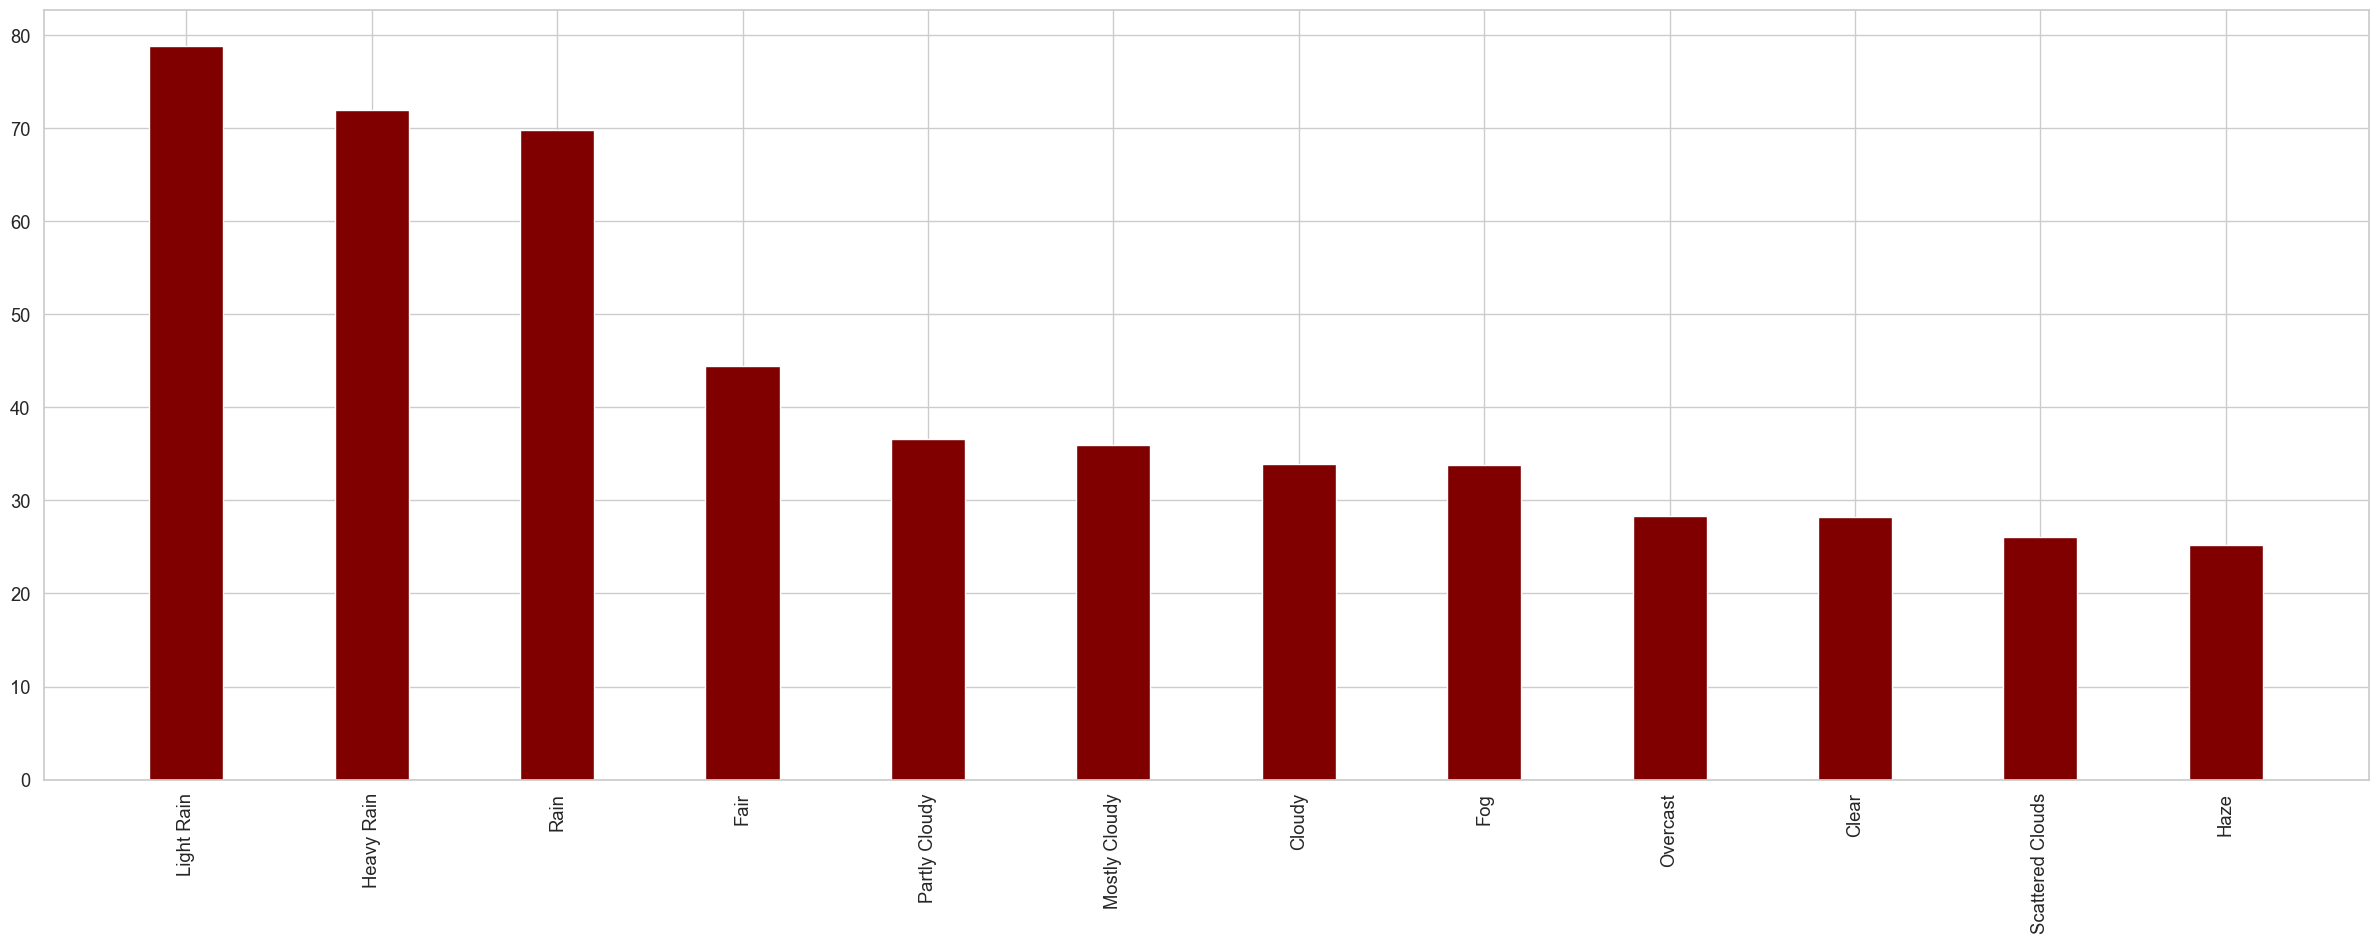

In [128]:
plt.figure(figsize=(30, 10))
plt.bar(number_by_weather.index, number_by_weather, color ='maroon', width = 0.4)
plt.xticks(rotation=90)
plt.show();

In [129]:
stats = np.array([])
shuffled = most_observed.copy()
org_stat = number_by_weather['Heavy Rain'] - number_by_weather['Fair']
for _ in range(10000):
    shuffled = shuffled.assign(shuffled = np.random.permutation(most_observed['Number of Accidents']))
    grouped = shuffled.groupby('Weather_Condition')['shuffled'].mean()
    stat = grouped['Heavy Rain'] - grouped['Fair']
    stats = np.append(stats, stat)
p_val = sum(stats>=org_stat)/10000
print(p_val)

0.0659


Our null hypothesis is that all weather conditions see the same mean number of accidents.
Our alternative hypothesis is when light rain is reported we see a greater mean number of accidents than when fair weather is reported.
We get a p value of 0.0667, low but not enough for us to reject the null hypothesis. This means we see generally the same mean number of accidents for each weather condition.

# Ethics & Privacy

There may be a bias in that we all live in San Diego, giving our emotional or personal input which may affect the data analysis process. We may also accidentally omit data that we think is irrelevant due to the assumption of low correlation to our question. We would like to prevent this by ensuring that we treat the dataset as data from any given state by changing perspective and ensuring anything omitted is properly analyzed and thought through with adequate evidence before disposing. 
There may also be a bias in reporting, like for example the police may report the incident as non-fatal at the time of the crash but the hospital may confirm the person dead after they have been brought to the hospital. This can change the way we may view the data. To ensure this doesn’t happen, we will be checking what measures were taken and how the data was recorded. As for privacy, we don’t expect for there to be an issue with the data we proposed, since we aren’t looking at the identities of people who crashed, or demographics in general. Crash data would be anonymous and analyzing the data won’t affect anyone whose accident was included.


# Discusison and Conclusion

Our analysis highlights the complex interaction between environmental factors and crash frequency and severity. While most crashes occurred during fair weather due to its frequency, extreme weather events like thunderstorms and heavy rain were associated with higher severity scores. This underscores the importance of considering environmental frequency when analyzing crash data. Similarly, crash severity was slightly higher during the day, likely due to the complex traffic interactions during peak hours. Interestingly, visibility levels did not strongly correlate with crash severity, suggesting that factors like driver behavior may play a more critical role. 

Variations in driving behaviors and travel patterns also contributed to differences in crash severity across the week, with Mondays and weekends showing slightly higher averages. Weekdays, particularly Wednesday through Friday, experienced the highest crash frequency due to commuter traffic. "Cloudy" weather conditions emerged as particularly hazardous when normalized for frequency, while "clear" weather reflected frequent occurrence rather than inherent danger. Despite high visibility, most crashes occurred during these periods, emphasizing the dominant influence of traffic flow and driver behavior over visibility. 

To further explore these dynamics, we conducted statistical analyses and predictive modeling. Using a permutation test, we found that although crashes on rainy days occurred more frequently than on fair days, the difference was not statistically significant at a 0.05 significance level (p = 0.1595). Our predictive model, which incorporated variables such as day of the week, visibility, and weather conditions, achieved an accuracy of 77%. The model's coefficients revealed how different factors influenced crash severity: for instance, precipitation increased the likelihood of Severity 3 crashes while reducing the likelihood of Severity 1 or 2 crashes. Such insights could aid law enforcement and emergency responders in anticipating and preparing for severe crashes under specific conditions.

Weather was a significant determinant, as confirmed by ANOVA and other statistical analyses, with rain and poor visibility notably raising risks. These findings emphasize the necessity of targeted safety initiatives addressing both behavioral and situational elements, particularly during high traffic flow and adverse weather. Data-driven strategies informed by our results can be instrumental in improving traffic safety, reducing collision rates, and guiding public safety measures, emergency responses, and insurance policy adjustments.


# Team Contributions

Cameron:
- Involved in every step of the project, including finding and cleaning data, designing methods and scope, and interpreting results. In addition, developed the boxplots for the factors: weather condition, lighting conditions, road conditions, and day of the week in relation to the severity of the car accidents. 

Samer:
- Samer played a key role in formulating the abstract and defining the research purpose. Contributed significantly to the statistical analysis by performing ANOVA to determine p-values and uncover meaningful insights. Additionally, was actively involved in the data cleaning process to ensure the accuracy and reliability of the dataset. Also created visual representations, such as graphs, to effectively illustrate differences between variables.

Jimmy:
- Cleaned the dataset so that it was usable for the analyses
- Provided LMPlots to observe relationships between severity and other variables, such as Visibility and Precipitation
- Provided density histograms to visualize different distributions and show the percentages of different severities. 
- Contributed to hypothesis testing

Andrew:
- Aided in finding dataset
- Univariate analysis on frequency of severity of crashes and weather observed during each crash, as well as creating associated visuals
- Created the Severity classification model and analyzed the coefficients that were fit to our variables
- Performed permutation test on mean number of crashes for rainy vs fair weather

Yusheng Liang:
- Create visuals with different factors and crashes, such as Weather, lighting conditions, road conditions, and day of the week . Find which factors are most predictive. Contribute to finding and cleaning data.